#  Data Munging and Data inspection
## Prepared by: MD KAMRUL ISLAM

# Exercise 01: United States - Crime Rates - 1960-2014

### Introduction:

This time you will create a data 

Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.

### Step 1. Import the necessary libraries

In [1]:
import pandas as pd

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/04_Apply/US_Crime_Rates/US_Crime_Rates_1960_2014.csv). 

In [2]:
df = pd.read_csv ("https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/04_Apply/US_Crime_Rates/US_Crime_Rates_1960_2014.csv")
df.head()

,Year,Population,Total,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
0,1960,179323175,3384200,288460,3095700,9110,17190,107840,154320,912100,1855400,328200
1,1961,182992000,3488000,289390,3198600,8740,17220,106670,156760,949600,1913000,336000
2,1962,185771000,3752200,301510,3450700,8530,17550,110860,164570,994300,2089600,366800
3,1963,188483000,4109500,316970,3792500,8640,17650,116470,174210,1086400,2297800,408300
4,1964,191141000,4564600,364220,4200400,9360,21420,130390,203050,1213200,2514400,472800


### Step 3. Assign it to a DataFrame variable called crime.

In [3]:
crime= df
crime.head()

,Year,Population,Total,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
0,1960,179323175,3384200,288460,3095700,9110,17190,107840,154320,912100,1855400,328200
1,1961,182992000,3488000,289390,3198600,8740,17220,106670,156760,949600,1913000,336000
2,1962,185771000,3752200,301510,3450700,8530,17550,110860,164570,994300,2089600,366800
3,1963,188483000,4109500,316970,3792500,8640,17650,116470,174210,1086400,2297800,408300
4,1964,191141000,4564600,364220,4200400,9360,21420,130390,203050,1213200,2514400,472800


### Step 4. What is the type of the columns?

In [4]:
crime.dtypes

Year                  int64
Population            int64
Total                 int64
Violent               int64
Property              int64
Murder                int64
Forcible_Rape         int64
Robbery               int64
Aggravated_assault    int64
Burglary              int64
Larceny_Theft         int64
Vehicle_Theft         int64
dtype: object

##### Have you noticed that the type of Year is int64. But pandas has a different type to work with Time Series. Let's see it now.

### Step 5. Convert the type of the column Year to datetime64

In [5]:
crime.Year= pd.to_datetime(crime.Year, format='%Y')
crime.dtypes

Year                  datetime64[ns]
Population                     int64
Total                          int64
Violent                        int64
Property                       int64
Murder                         int64
Forcible_Rape                  int64
Robbery                        int64
Aggravated_assault             int64
Burglary                       int64
Larceny_Theft                  int64
Vehicle_Theft                  int64
dtype: object

### Step 6. Set the Year column as the index of the dataframe (you may want to use set_index())

In [6]:
crime = crime.set_index('Year',drop=True)
crime.head()

,Population,Total,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
Year,,,,,,,,,,,
1960-01-01,179323175,3384200,288460,3095700,9110,17190,107840,154320,912100,1855400,328200
1961-01-01,182992000,3488000,289390,3198600,8740,17220,106670,156760,949600,1913000,336000
1962-01-01,185771000,3752200,301510,3450700,8530,17550,110860,164570,994300,2089600,366800
1963-01-01,188483000,4109500,316970,3792500,8640,17650,116470,174210,1086400,2297800,408300
1964-01-01,191141000,4564600,364220,4200400,9360,21420,130390,203050,1213200,2514400,472800


### Step 7. Delete the Total column

In [7]:
del crime['Total']
crime.head()

### We can also use drop function instead of del function, both work as same 
#crime=crime.drop("Total", axis =1)
#crime.head()

,Population,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
Year,,,,,,,,,,
1960-01-01,179323175,288460,3095700,9110,17190,107840,154320,912100,1855400,328200
1961-01-01,182992000,289390,3198600,8740,17220,106670,156760,949600,1913000,336000
1962-01-01,185771000,301510,3450700,8530,17550,110860,164570,994300,2089600,366800
1963-01-01,188483000,316970,3792500,8640,17650,116470,174210,1086400,2297800,408300
1964-01-01,191141000,364220,4200400,9360,21420,130390,203050,1213200,2514400,472800


### Step 8. Group the year by decades and sum the values
#### Hint: 
#### To get the decade, you can integer-divide the year by 10 and then multiply by 10. You can use '//' for floor division. 
#### Pay attention to the Population column number, summing this column is a mistake

######    We know that summing up the population is a mistake.Therefore we can put/assign the maximum value of population of any year during a perticular decade.For which we can create a "Population" column using groupby of maximum value of population of any year during a decade.Then we can replace the Population column of groupby of sum values by that Population column of max

In [8]:
Population = crime.groupby((crime.index.year//10)*10).max()["Population"]
crime = crime.groupby((crime.index.year//10)*10).sum()
crime['Population'] = Population
crime

,Population,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
Year,,,,,,,,,,
1960,201385000,4134930,45160900,106180,236720,1633510,2158520,13321100,26547700,5292100
1970,220099000,9607930,91383800,192230,554570,4159020,4702120,28486000,53157800,9739900
1980,248239000,14074328,117048900,206439,865639,5383109,7619130,33073494,72040253,11935411
1990,272690813,17527048,119053499,211664,998827,5748930,10568963,26750015,77679366,14624418
2000,307006550,13968056,100944369,163068,922499,4230366,8652124,21565176,67970291,11412834
2010,318857056,6072017,44095950,72867,421059,1749809,3764142,10125170,30401698,3569080


In [9]:
#Let's replace the index title from Year to Decade
crime.index.name= "Decade"
crime

,Population,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
Decade,,,,,,,,,,
1960,201385000,4134930,45160900,106180,236720,1633510,2158520,13321100,26547700,5292100
1970,220099000,9607930,91383800,192230,554570,4159020,4702120,28486000,53157800,9739900
1980,248239000,14074328,117048900,206439,865639,5383109,7619130,33073494,72040253,11935411
1990,272690813,17527048,119053499,211664,998827,5748930,10568963,26750015,77679366,14624418
2000,307006550,13968056,100944369,163068,922499,4230366,8652124,21565176,67970291,11412834
2010,318857056,6072017,44095950,72867,421059,1749809,3764142,10125170,30401698,3569080


### Step 9. What is the most dangerous decade to live in the US?

### To answer this question we can use differnt method, I described two of them
#### Method 1
#### We can use indxmax method to find maximum number of decade that has maximum types of crime
#### Method 2
#### We can also use bar plot to visualize the total amount of crime during a dicade. For this we have to drop the population column and sum up the crime the run the bar plot code

In [10]:
#Method 1: (usig idxmax function)
crime.idxmax()

Population            2010
Violent               1990
Property              1990
Murder                1990
Forcible_Rape         1990
Robbery               1990
Aggravated_assault    1990
Burglary              1980
Larceny_Theft         1990
Vehicle_Theft         1990
dtype: int64

<AxesSubplot:xlabel='Decade'>

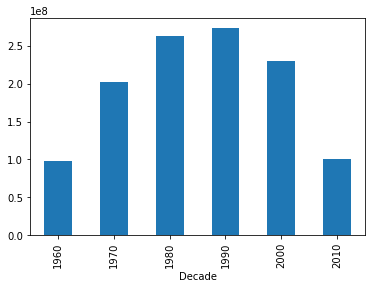

In [11]:
# Method 2: Using Bar plot 
crime.drop('Population', axis=1).sum(axis=1).plot.bar()

#### Answer: Based on the above observations we can conclude that 1990 is the worse decade to live in US

# Exercise 02: Drinks

### Step 1. Import the necessary libraries

In [ ]:
## I have imported pandas library in the excercise O1, it will work for this exercise 02 as well

### Step 2. Import the dataset from this [address ](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/drinks.csv)  

In [12]:
df= pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/drinks.csv')
df.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


### Step 3. Assign it to a DataFrame variable called drinks

In [13]:
drinks= df
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


### Step 4. Which continent drinks more beer on average?

In [14]:
drinks.groupby('continent')['beer_servings'].mean()

continent
AF     61.471698
AS     37.045455
EU    193.777778
OC     89.687500
SA    175.083333
Name: beer_servings, dtype: float64

#### Answer: EU

### Step 5. For each continent print the statistics for wine consumption

In [15]:
wine_statistics = df.groupby('continent').wine_servings.describe()
wine_statistics

,count,mean,std,min,25%,50%,75%,max
continent,,,,,,,,
AF,53.0,16.264151,38.846419,0.0,1.0,2.0,13.00,233.0
AS,44.0,9.068182,21.667034,0.0,0.0,1.0,8.00,123.0
EU,45.0,142.222222,97.421738,0.0,59.0,128.0,195.00,370.0
OC,16.0,35.625000,64.555790,0.0,1.0,8.5,23.25,212.0
SA,12.0,62.416667,88.620189,1.0,3.0,12.0,98.50,221.0


### Step 6. Print the mean alcohol consumption per continent for every column

In [16]:
drinks.groupby('continent').mean()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
continent,,,,
AF,61.471698,16.339623,16.264151,3.007547
AS,37.045455,60.840909,9.068182,2.170455
EU,193.777778,132.555556,142.222222,8.617778
OC,89.687500,58.437500,35.625000,3.381250
SA,175.083333,114.750000,62.416667,6.308333


### Step 7. Print the median alcohol consumption per continent for every column

In [17]:
drinks.groupby('continent').median()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
continent,,,,
AF,32.0,3.0,2.0,2.30
AS,17.5,16.0,1.0,1.20
EU,219.0,122.0,128.0,10.00
OC,52.5,37.0,8.5,1.75
SA,162.5,108.5,12.0,6.85


### Step 8. Print the mean, min and max values for spirit consumption.
#### This time output a DataFrame

In [18]:
Spirit_consumption = drinks.groupby('continent').spirit_servings.agg(['mean','min','max'])
Spirit_consumption

,mean,min,max
continent,,,
AF,16.339623,0,152
AS,60.840909,0,326
EU,132.555556,0,373
OC,58.437500,0,254
SA,114.750000,25,302
